In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

RANDOM_SEED = 33

In [3]:
#CSV_PATH = 'College.csv'
df = pd.read_csv(CSV_PATH)
df = df.rename(columns={'Unnamed: 0':'UniversityName'})
df['Private'] = df['Private'].replace({'Yes': 1, 'No': 0})


In [4]:
plt.style.use('seaborn-darkgrid')

<ipython-input-4-8bb825865078>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


# Análise Exploratória dos Dados

Text(0.5, 0, 'Tipo de faculdade')

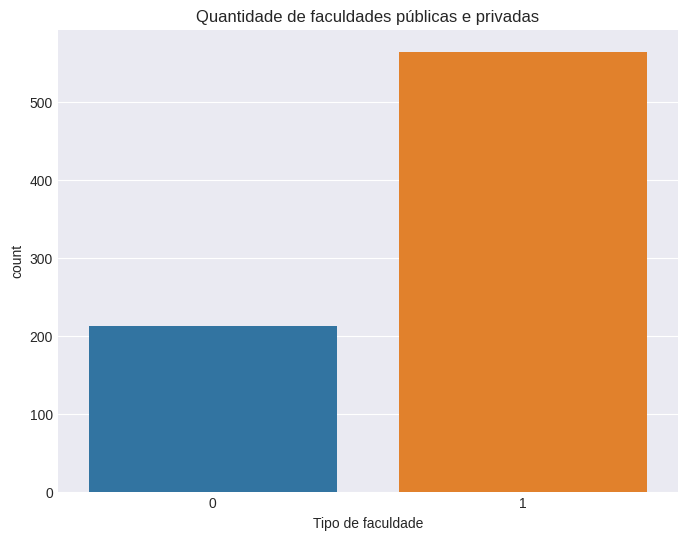

In [ ]:
fig, axes = plt.subplots()
fig.set_size_inches((8,6))
axes.set_title('Quantidade de faculdades públicas e privadas')
sns.countplot(data=df, x='Private')
axes.set_xlabel('Tipo de faculdade')

Comparando universidades privadas excepcionais com universidades públicas

In [ ]:
df.loc[df['UniversityName'].str.contains('Harvard|Princeton')]

,UniversityName,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
250,Harvard University,1,13865,2165,1606,90,100,6862,320,18485,6410,500,1920,97,97,9.9,52,37219,100
459,Princeton University,1,13218,2042,1153,90,98,4540,146,19900,5910,675,1575,91,96,8.4,54,28320,99


In [ ]:
df.query('Private == 0').sample(n=3, random_state=RANDOM_SEED)

,UniversityName,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
78,California Polytechnic-San Luis,0,7811,3817,1650,47,73,12911,1404,7380,4877,612,2091,72,81,19.8,13,8453,59
658,University of Northern Colorado,0,5530,4007,1697,12,37,8463,1498,7731,4128,540,2286,75,75,21.5,8,6309,40
375,Mississippi State University,0,4255,3277,1609,18,57,10094,1621,9866,3084,480,1479,77,77,15.9,20,6223,53


Comparando os histogramas de cada feature para faculdades públicas e privadas

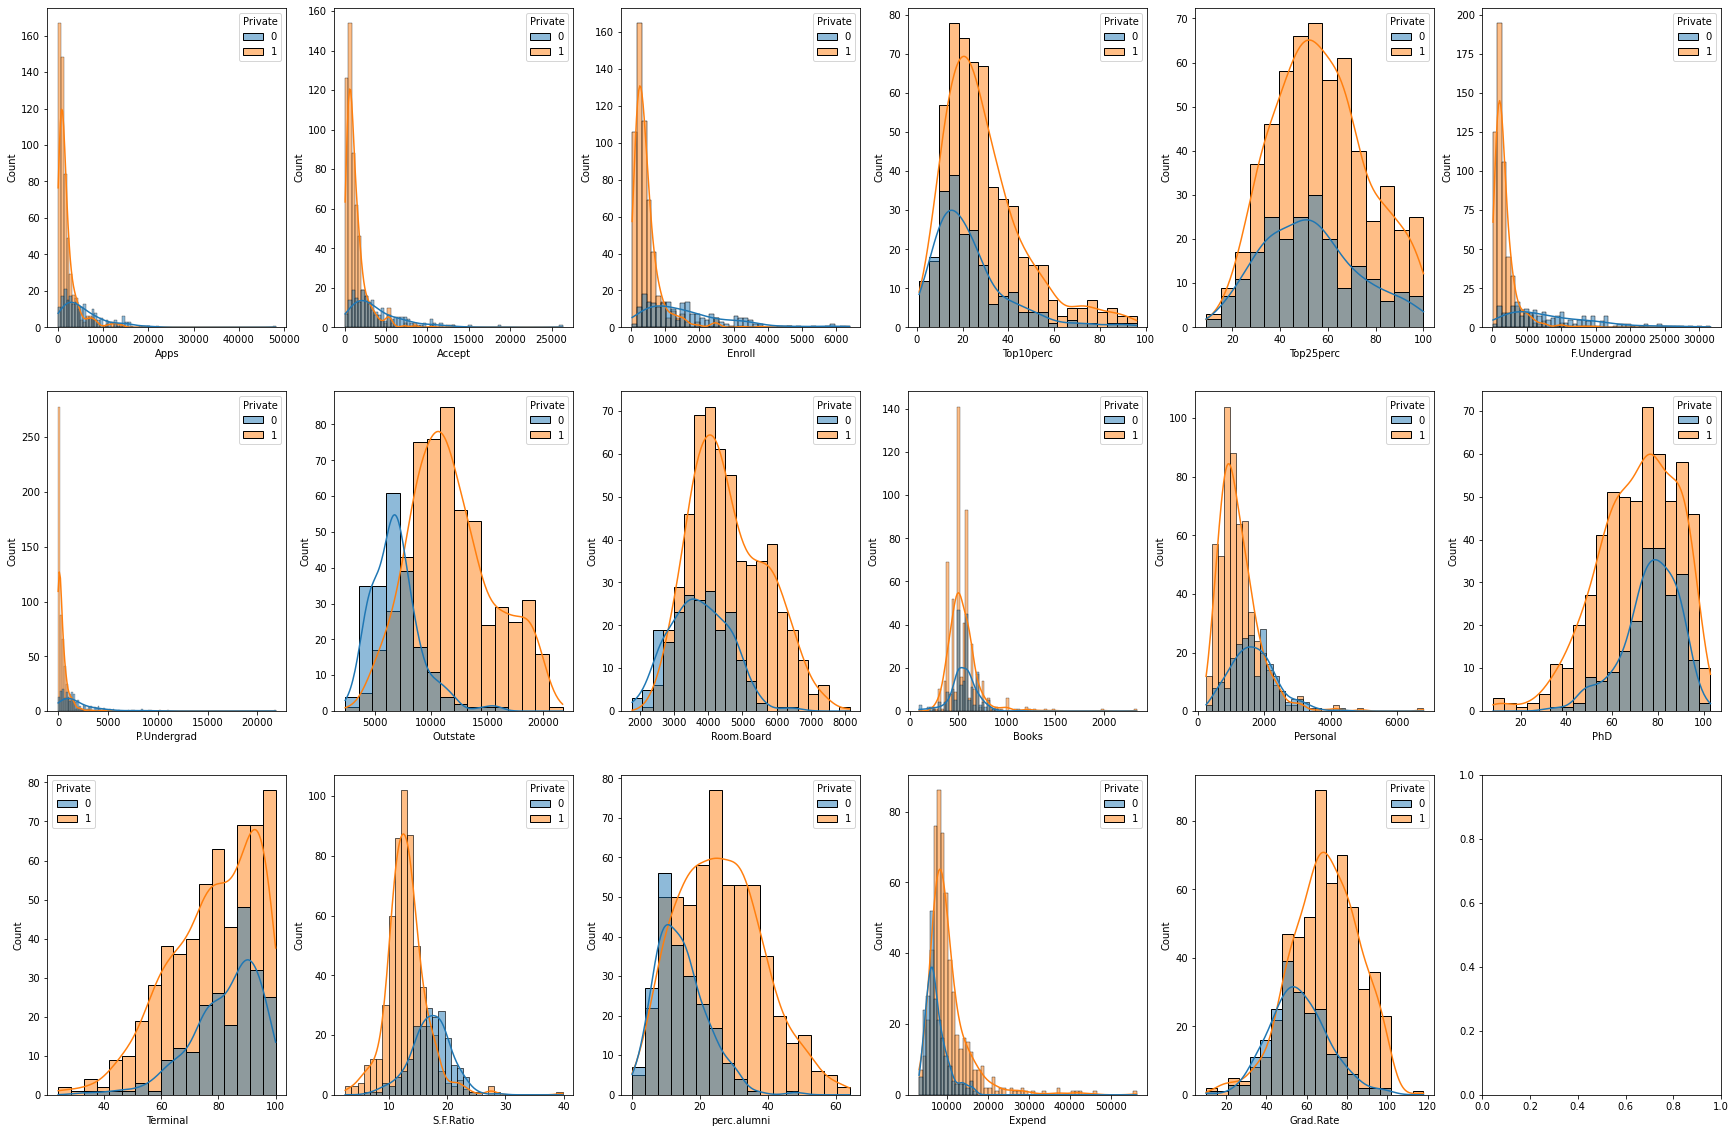

In [ ]:
columns = [col for col in df.columns if col not in ['UniversityName', 'Private']]
fig, axes = plt.subplots(3, 6)
fig.set_size_inches((30, 20))
cnt = 0

for row in range(0, 3):
    for col in range(0, 6):
        if cnt == len(columns):
            continue
        sns.histplot(data=df, x=columns[cnt], hue='Private', kde=True, ax=axes[row, col])
        cnt += 1

Obtendo a matriz de correlação

In [ ]:
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

/tmp/ipykernel_52777/2671424953.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.corr(), dtype=bool))


/tmp/ipykernel_52777/2818537156.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), ax=axes, annot=True, square=True, vmax=1.0, mask=mask, cmap=cmap)


[Text(0.5, 0, 'Private'),
 Text(1.5, 0, 'Apps'),
 Text(2.5, 0, 'Accept'),
 Text(3.5, 0, 'Enroll'),
 Text(4.5, 0, 'Top10perc'),
 Text(5.5, 0, 'Top25perc'),
 Text(6.5, 0, 'F.Undergrad'),
 Text(7.5, 0, 'P.Undergrad'),
 Text(8.5, 0, 'Outstate'),
 Text(9.5, 0, 'Room.Board'),
 Text(10.5, 0, 'Books'),
 Text(11.5, 0, 'Personal'),
 Text(12.5, 0, 'PhD'),
 Text(13.5, 0, 'Terminal'),
 Text(14.5, 0, 'S.F.Ratio'),
 Text(15.5, 0, 'perc.alumni'),
 Text(16.5, 0, 'Expend'),
 Text(17.5, 0, 'Grad.Rate')]

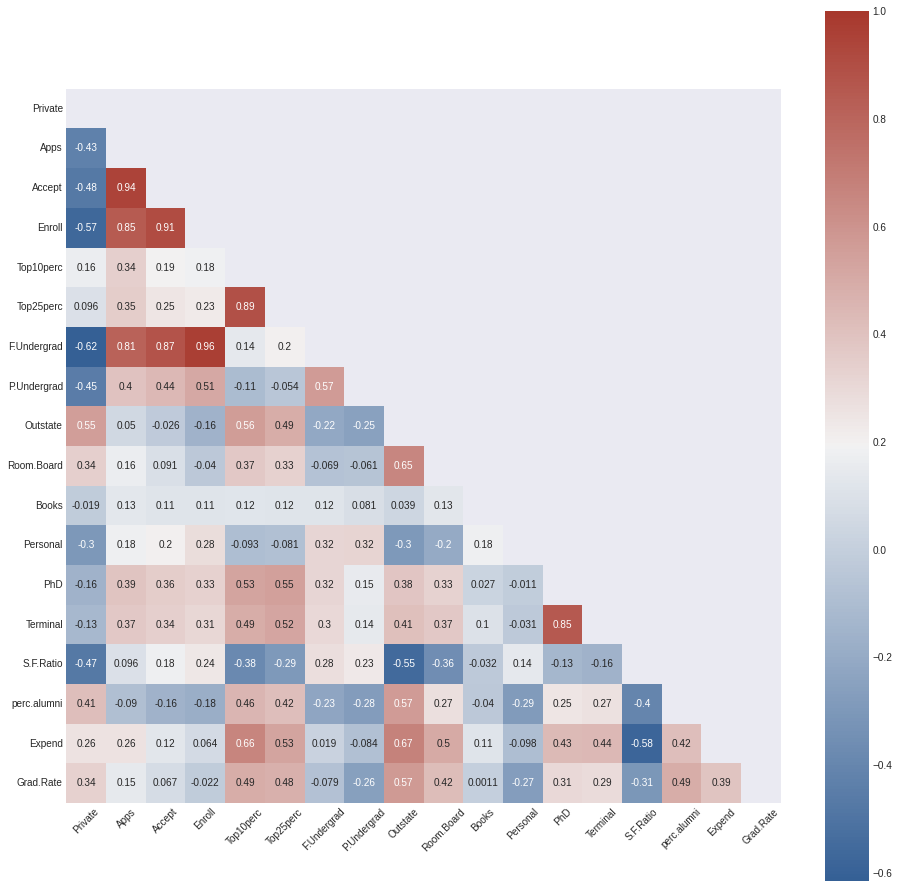

In [ ]:
fig, axes = plt.subplots()
fig.set_size_inches((16, 16))
sns.heatmap(data=df.corr(), ax=axes, annot=True, square=True, vmax=1.0, mask=mask, cmap=cmap)
axes.set_xticklabels(axes.get_xticklabels(), rotation=45)

/tmp/ipykernel_52777/1567373908.py:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Private'])[1:].plot(kind='bar', title='Correlação com o target', colormap=cmap)


<AxesSubplot:title={'center':'Correlação com o target'}>

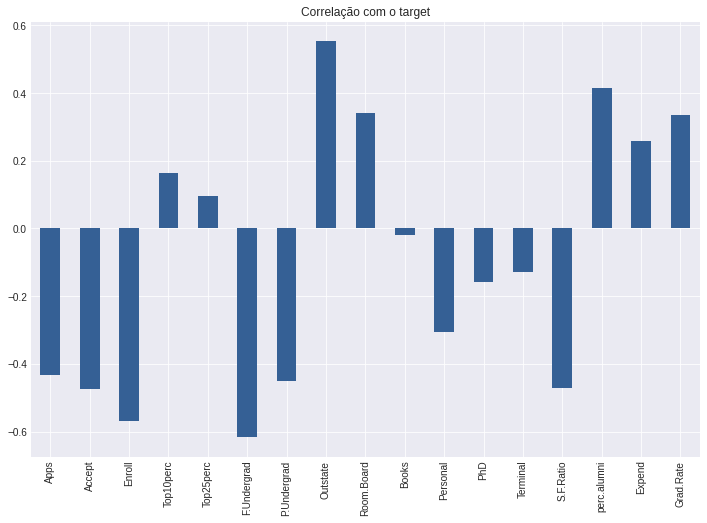

In [ ]:
fig, axes = plt.subplots()
fig.set_size_inches((12, 8))
df.corrwith(df['Private'])[1:].plot(kind='bar', title='Correlação com o target', colormap=cmap)

### Redução de dimensionalidade para visualização

PCA

In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


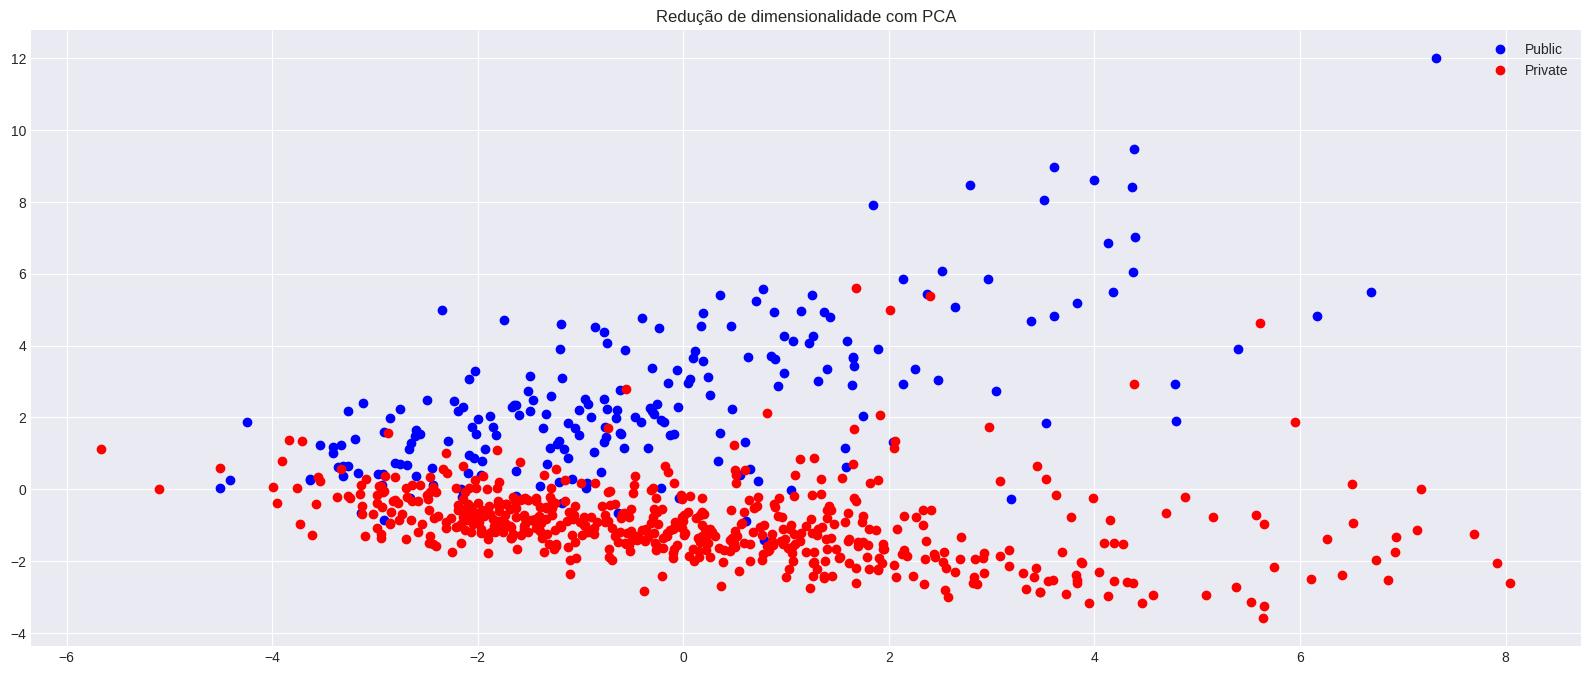

In [6]:
from sklearn.preprocessing import StandardScaler
X_scal = StandardScaler().fit_transform(df.drop(columns=['UniversityName', 'Private']))
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scal)

pca_public = principal_components[df.query('Private == 0').index]
pca_private = principal_components[df.query('Private == 1').index]

plt.figure(figsize=(20, 8))
plt.title('Redução de dimensionalidade com PCA')
plt.plot(pca_public[:, 0], pca_public[:, 1], 'o', color='b', label='Public')
plt.plot(pca_private[:, 0], pca_private[:, 1], 'o', color='r', label='Private')
plt.legend()


# Preparação dos dados

In [7]:
scaler = StandardScaler()
scaler.fit(df.drop(columns=['UniversityName', 'Private']))
X_normalized = scaler.transform(df.drop(columns=['UniversityName', 'Private']))

# Modelagem Não-Supervisionada

## KMeans

In [9]:
k_list = list(range(1, 21))
inertia_list = []
def createPlot(model = "Kmeans"):
  for k in k_list:
      if(model == "Kmeans"):
        model_kmeans = KMeans(n_clusters=k, random_state=RANDOM_SEED, n_init='auto').fit(X_normalized)
      else:
        model_kmeans = KMedoids(n_clusters=k, random_state=42)
        model_kmeans.fit(X_normalized)
      inertia_list.append(model_kmeans.inertia_)
createPlot()

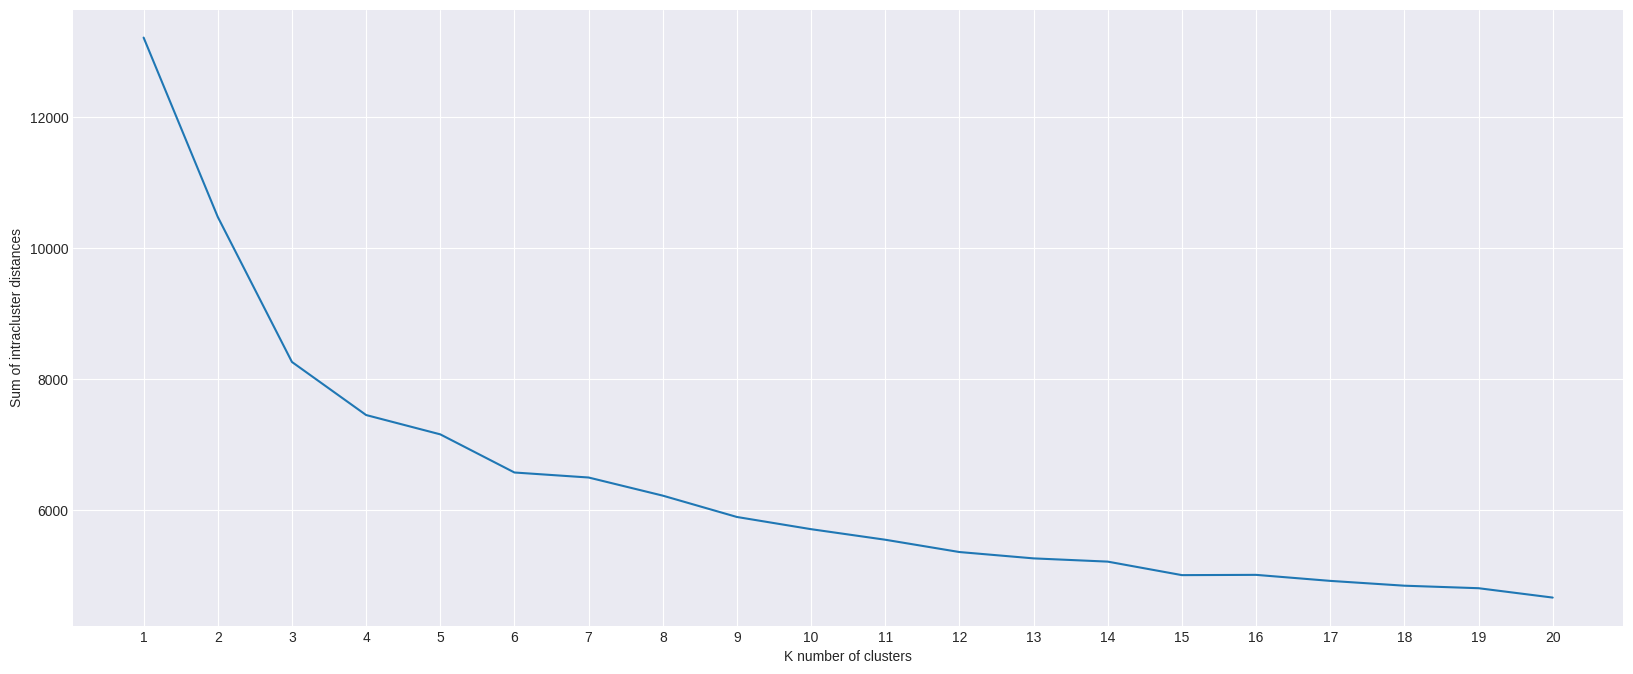

In [10]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.set_xlabel('K number of clusters')
ax.set_ylabel('Sum of intracluster distances')
ax.set_xticks(list(range(1,21)))
ax.plot(k_list, inertia_list)

In [ ]:
inertia_list[1] - inertia_list[0], inertia_list[2] - inertia_list[1]

(-2739.4653164758565, -2215.030163151101)

In [ ]:
from kneed import KneeLocator

k_elbow = KneeLocator(x=range(1, 21), y=inertia_list, curve="convex", direction="decreasing").elbow
k_elbow

6

Testando para K=2

In [ ]:
model_2means = KMeans(n_clusters=2, random_state=RANDOM_SEED, n_init='auto').fit(X_normalized)
df['2means_cluster'] = model_2means.predict(X_normalized)

In [ ]:
len(model_2means.cluster_centers_)

2

In [ ]:
def plot_kmeans_pca(df, X_normalized, k):
    model_kmeans = KMeans(n_clusters=k, random_state=RANDOM_SEED, n_init='auto').fit(X_normalized)
    preds = model_kmeans.predict(X_normalized)
    df['cluster'] = preds
    """
    FALTA ACABAR ESSA FUNCAO
    """


In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_normalized)

pca_public = principal_components[df.query('Private == 0').index]
pca_private = principal_components[df.query('Private == 1').index]

plt.figure(figsize=(20, 8))
plt.title('Redução de dimensionalidade com PCA')
plt.plot(pca_public[:, 0], pca_public[:, 1], 'o', color='b', label='Public')
plt.plot(pca_private[:, 0], pca_private[:, 1], 'o', color='r', label='Private')
plt.legend()


##K-Medoids

In [ ]:
!pip install https://github.com/scikit-learn-contrib/scikit-learn-extra/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 740.1 kB 20.9 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0.dev0-cp39-cp39-linux_x86_64.whl size=1950480 sha256=a446129339fe32ff8617833d53f226b79e7bdc0998ebf479cf75ebd199f92df3
  Stored in directory: /tmp/pip-ephem-wheel-cache-efklo4_3/wheels/2a/50/ef/8f550e66b73775b0d138e1bc5ae39027b81675bfe6a0061099
Successfully built scikit-learn-extra


In [ ]:
from sklearn_extra.cluster import KMedoids
# Define the K-medoids clustering algorithm
kmedoids = KMedoids(n_clusters=2, random_state=42)

In [ ]:
kmedoids.fit(X_normalized)

KMedoids(n_clusters=2, random_state=42)

In [ ]:
# Get the indices of the medoids
medoid_indices = kmedoids.medoid_indices_

# Get the labels assigned to each point
labels = kmedoids.labels_

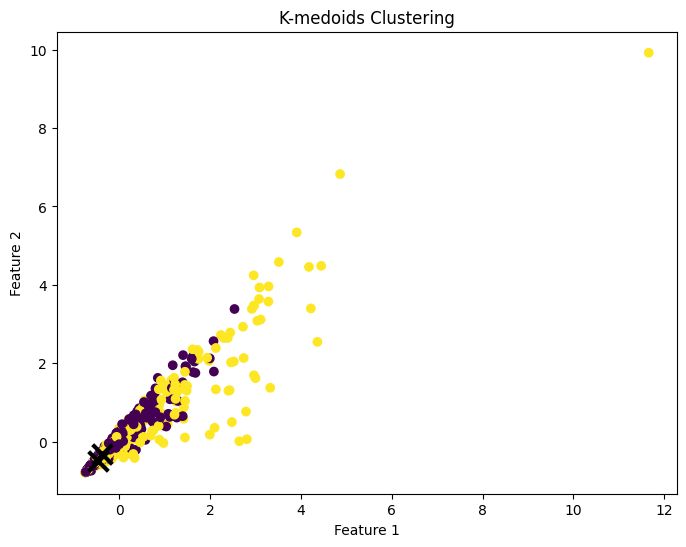

In [ ]:
# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=labels, cmap='viridis')
plt.scatter(X_normalized[medoid_indices, 0], X_normalized[medoid_indices, 1], marker='x', color='black', s=200, linewidths=3)
plt.title('K-medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Analyze the clusters
for i in range(kmedoids.n_clusters):
    cluster_points = X_normalized[labels == i]
    medoid = X_normalized[medoid_indices[i]]
    print(f"Cluster {i+1}: {len(cluster_points)} points, medoid: {medoid}")

Cluster 1: 421 points, medoid: [-0.46374683 -0.49634065 -0.36827595 -0.42875686 -0.39392898 -0.37008396
 -0.33605965 -0.90305567 -0.35358554 -0.60231216  0.45276627 -0.34687799
 -0.31963165  0.45763069  0.26293276 -0.7565855  -0.37650442]
Cluster 2: 356 points, medoid: [-0.37351256 -0.32324666 -0.31335327  0.5355628   0.66710422 -0.35811853
 -0.50892085  0.46620193  0.18930239  0.30678382  0.03599838  0.75622242
  0.69988311 -0.40186651  0.10143177  0.12395139  0.43903024]
